<a href="https://colab.research.google.com/github/labibaa/Forecasting-Inflation/blob/main/NewLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetf_1 - cpi_month.csv to datasetf_1 - cpi_month (1).csv


In [ ]:
data = pd.read_csv('datasetf_1 - cpi_month.csv')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')


In [ ]:
data.set_index('Date', inplace=True)
dataset = data['Inflation'].values.reshape(-1, 1)



In [ ]:
#train_size = int(len(dataset) * 0.9)  # Use 90% of data for training
#train_data, test_data = dataset[:train_size], dataset[train_size:]

In [ ]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
#train_data = scaler.fit_transform(train_data)
#test_data = scaler.transform(test_data)

In [ ]:
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [ ]:
window_size = 10


In [ ]:
X, y = create_dataset(dataset, window_size)


In [ ]:
#X_test, y_test = create_dataset(test_data, window_size)


In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [ ]:
model.fit(X, y, epochs=250, batch_size=128, verbose=1)


Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 0.0549
Epoch 2/250
1/1 [==============================] - 0s 24ms/step - loss: 0.0500
Epoch 3/250
1/1 [==============================] - 0s 22ms/step - loss: 0.0455
Epoch 4/250
1/1 [==============================] - 0s 18ms/step - loss: 0.0412
Epoch 5/250
1/1 [==============================] - 0s 17ms/step - loss: 0.0374
Epoch 6/250
1/1 [==============================] - 0s 16ms/step - loss: 0.0338
Epoch 7/250
1/1 [==============================] - 0s 16ms/step - loss: 0.0306
Epoch 8/250
1/1 [==============================] - 0s 16ms/step - loss: 0.0276
Epoch 9/250
1/1 [==============================] - 0s 18ms/step - loss: 0.0249
Epoch 10/250
1/1 [==============================] - 0s 16ms/step - loss: 0.0225
Epoch 11/250
1/1 [==============================] - 0s 21ms/step - loss: 0.0205
Epoch 12/250
1/1 [==============================] - 0s 18ms/step - loss: 0.0188
Epoch 13/250
1/1 [==============================] -

In [ ]:
predictions = model.predict(X)


4/4 [==============================] - 0s 4ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)


In [ ]:
actual_values = scaler.inverse_transform(y)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
def calculate_mape(actual_values, predictions):
    return np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

mape = calculate_mape(actual_values, predictions)

rmse = mean_squared_error(actual_values, predictions, squared=False)

mae = mean_absolute_error(actual_values, predictions)

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape)


Mean Absolute Error (MAE): 0.19448601016291867
Root Mean Squared Error (RMSE): 0.30663325766907373
Mean Absolute Percentage Error (MAPE): 3.1515768464759404


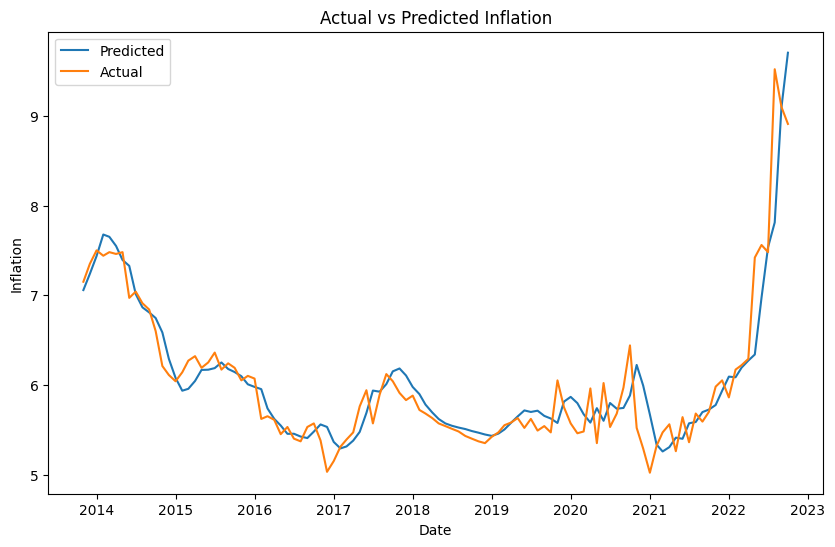

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index[window_size:], predictions, label='Predicted')
plt.plot(data.index[window_size:], data['Inflation'].values[window_size:], label='Actual')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title('Actual vs Predicted Inflation')
plt.legend()
plt.show()

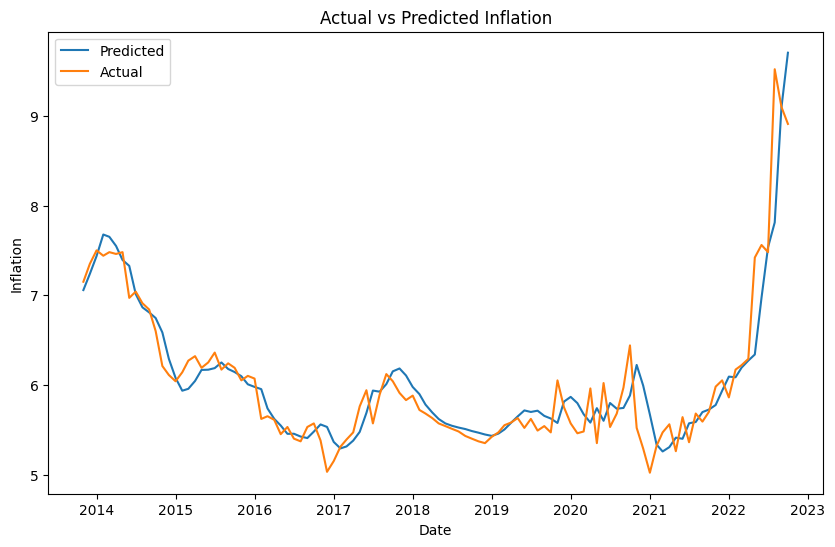

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index[window_size:], predictions, label='Predicted')
plt.plot(data.index[window_size:], data['Inflation'].values[window_size:], label='Actual')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title('Actual vs Predicted Inflation')
plt.legend()
plt.show()

In [ ]:
forecasted_values = model.predict(X)


4/4 [==============================] - 0s 4ms/step


In [ ]:
forecast_df = pd.DataFrame({
    'Date': data.index[window_size:],
    'Actual Inflation': data['Inflation'].values[window_size:],
    'Predicted Inflation': predictions.flatten()
})


In [ ]:
forecast_df

,Date,Actual Inflation,Predicted Inflation
0,2013-11-01,7.15,7.057059
1,2013-12-01,7.35,7.238426
2,2014-01-01,7.50,7.436723
3,2014-02-01,7.44,7.676697
4,2014-03-01,7.48,7.650917
...,...,...,...
103,2022-06-01,7.56,6.972509
104,2022-07-01,7.48,7.534063
105,2022-08-01,9.52,7.811249
106,2022-09-01,9.10,9.092522


In [ ]:
forecast_df.to_csv('forecasted_data.csv', index=False)

In [ ]:
from google.colab import files
forecast_df.to_csv('forecast_df.csv', encoding = 'utf-8-sig')
files.download('forecast_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>